In [32]:
import os
import tsfel
import pandas as pd
import numpy as np
from glob import glob


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# # load dataset
# df = pd.read_csv('train/segment0.csv')

# Retrieves a pre-defined feature configuration file to extract all available features
# cfg = tsfel.get_features_by_domain()

# # Extract features
# X = tsfel.time_series_features_extractor(cfg, df)

In [3]:
cfg = tsfel.get_features_by_domain('statistical')

In [4]:
df_activity = pd.read_csv("activities.csv")

In [5]:
def get_act_id(seg_id):
    seg = df_activity[df_activity["segment_id"]==seg_id]
    activity_id = seg["activity_id"].values
    return int(activity_id)

In [6]:
def handle_missing_values(df):
    df['x']=df['x'].replace(0, np.nan)
    df['y']=df['y'].replace(0, np.nan)
    df['z']=df['z'].replace(0, np.nan)
    return df

In [7]:
def load_data(csv_file):

    y_list = []
    x_data_list = []

    csv_df = pd.read_csv(csv_file)
    csv_df = handle_missing_values(csv_df)
    csv_df.dropna(inplace=True)
    act_id = get_act_id(int(os.path.splitext(os.path.basename(csv_file))[0].replace("segment","")))
    
    return csv_df,act_id

In [8]:
def features_extraction(df):
    X = tsfel.time_series_features_extractor(cfg, df)
    return X

In [9]:
def fill_missing_values(df):
    """ Handle eventual missing data. Strategy: replace with mean.
    
      Parameters
      ----------
      df pandas DataFrame
      Returns
      -------
        Data Frame without missing values.
    """
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(df.mean(), inplace=True)
    return df

In [10]:
csv_files = glob("train/*")

In [11]:
df = pd.read_csv(csv_files[0])
df_ = features_extraction(df)

*** Feature extraction started ***

*** Feature extraction finished ***


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Using default sampling frequency set in configuration file.
  


In [12]:
df_

,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF Slope,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,...,2_Max,2_Mean,2_Mean absolute deviation,2_Median,2_Median absolute deviation,2_Min,2_Root mean square,2_Skewness,2_Standard deviation,2_Variance
0,23.0,94.0,-2.068,0.306,0.197785,0.008475,0.016949,0.025424,0.033898,0.042373,...,10.454,1.100966,1.638232,0.081,0.076,0.0,2.75818,2.569853,2.528919,6.395433


In [13]:
X_feature_data_list = []
y_list = []
for csv_file in csv_files:
    x,y = load_data(csv_file)
    df_ = features_extraction(x)
    df_ = fill_missing_values(df_)
    X_feature_data_list.append(df_.values.reshape(-1))
    y_list.append(y)

*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Using default sampling frequency set in configuration file.
  



*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction star


*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction started ***

*** Feature extraction finished ***
*** Feature extraction star

In [14]:
df_feature = pd.DataFrame(X_feature_data_list)

In [15]:
df_feature["activity"] = y_list

In [16]:
df_feature = df_feature.dropna()

In [20]:
X_train,X_test,y_train,y_test = train_test_split(df_feature.drop("activity",axis=1).values,df_feature["activity"].values,test_size=0.3)

In [21]:
model_ml = RandomForestClassifier(n_estimators=500,n_jobs=-1)

In [22]:
model_ml.fit(X_train,y_train)
y_predict = model_ml.predict(X_test)

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.50      0.43      0.46         7
           3       0.77      0.77      0.77        13
           4       1.00      0.71      0.83         7
           6       0.00      0.00      0.00        10
           9       0.75      1.00      0.86         6
          12       0.43      0.82      0.56        11

    accuracy                           0.61        54
   macro avg       0.57      0.62      0.58        54
weighted avg       0.55      0.61      0.56        54



# features Importance

In [49]:
importances = model_ml.feature_importances_  
indices = np.argsort(importances)[::-1]

In [52]:
feature_labels = [col for col in df_.columns]

In [53]:
for f in range(np.array(X_train).shape[1]):
    print("%2d) %s %f" % (f + 1,feature_labels[indices[f]],importances[indices[f]]))

 1) 1_Max 0.048848
 2) 1_Skewness 0.037039
 3) 0_Mean 0.030984
 4) 0_ECDF Percentile_1 0.029256
 5) 0_Median absolute deviation 0.026343
 6) 0_Interquartile range 0.026013
 7) 0_Mean absolute deviation 0.024514
 8) 1_Kurtosis 0.023340
 9) 0_Max 0.023149
10) 0_Standard deviation 0.022708
11) 2_Root mean square 0.021927
12) 0_Variance 0.021908
13) 1_Variance 0.019109
14) 1_Standard deviation 0.018530
15) 0_Kurtosis 0.018398
16) 2_Variance 0.017720
17) 1_ECDF Percentile_1 0.016970
18) 0_Median 0.016535
19) 2_ECDF Percentile_1 0.016239
20) 2_Mean 0.015040
21) 2_Kurtosis 0.014822
22) 2_Standard deviation 0.014548
23) 2_Histogram_5 0.014469
24) 2_Min 0.014437
25) 2_Max 0.013862
26) 1_Mean absolute deviation 0.013702
27) 1_ECDF Slope 0.013686
28) 0_ECDF Slope 0.013641
29) 2_Median 0.013423
30) 0_ECDF Percentile_0 0.013306
31) 1_Median 0.013120
32) 2_Skewness 0.013009
33) 2_ECDF Percentile_0 0.012580
34) 0_Skewness 0.012260
35) 1_Root mean square 0.012211
36) 1_Mean 0.012070
37) 2_Mean absolut

# features correlation

In [68]:
# Highly correlated features are removed
df_feture_droped_activity = df_feature.drop("activity",axis=1)
df_feture_droped_activity.columns = feature_labels 
corr_features = tsfel.correlated_features(df_feture_droped_activity)
for corr in (corr_features):
    print(corr)

0_ECDF Percentile Count_1
0_ECDF_1
0_ECDF_2
0_ECDF_3
0_ECDF_4
0_ECDF_5
0_ECDF_6
0_ECDF_7
0_ECDF_8
0_ECDF_9
0_Standard deviation
0_Variance
1_ECDF Percentile Count_0
1_ECDF Percentile Count_1
1_ECDF_0
1_ECDF_1
1_ECDF_2
1_ECDF_3
1_ECDF_4
1_ECDF_5
1_ECDF_6
1_ECDF_7
1_ECDF_8
1_ECDF_9
1_Standard deviation
1_Variance
2_ECDF Percentile Count_0
2_ECDF Percentile Count_1
2_ECDF_0
2_ECDF_1
2_ECDF_2
2_ECDF_3
2_ECDF_4
2_ECDF_5
2_ECDF_6
2_ECDF_7
2_ECDF_8
2_ECDF_9
2_Standard deviation
2_Variance


In [63]:
df_feature_corr = df_feture_droped_activity.corr()

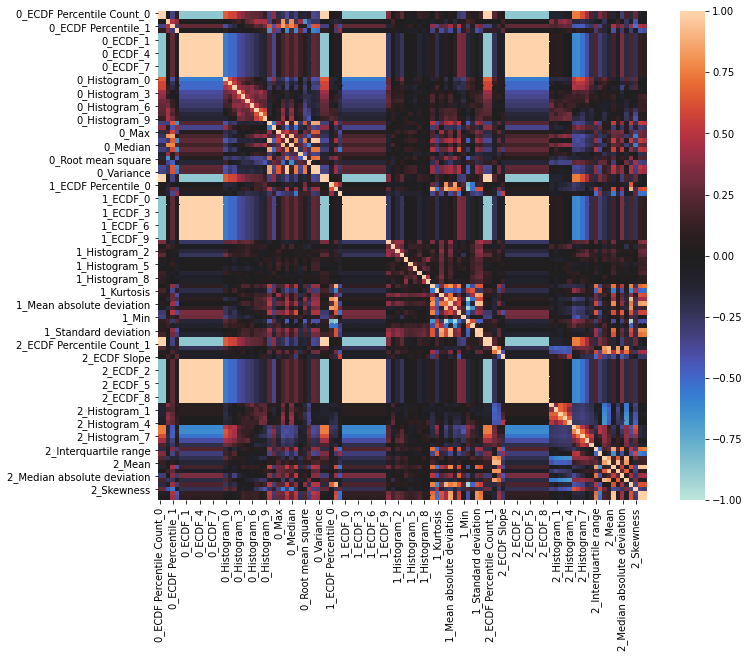

In [66]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_feature_corr , square=True, vmax=1, vmin=-1, center=0)